# Kaggle Dataset
https://www.kaggle.com/datasets/nopdev/real-and-fake-news-dataset

In [1]:
#import pandas library
import pandas as pd

In [2]:
#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv('Fake_Real_Data.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
#print the shape of dataframe
df.shape

(6335, 4)

In [4]:
#print top 5 rows
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#check the distribution of labels
df.label.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [6]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df['label_num'] = df['label'].map({
    'FAKE': 0,
    'REAL': 1
})

In [7]:
#check the results with top 5 rows
df.head()

,Unnamed: 0,title,text,label,label_num
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


In [8]:
#import train-test-split from sklearn 
from sklearn.model_selection import train_test_split

In [11]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(df.text,df.label_num, test_size = 0.2, random_state = 2022, stratify = df.label_num)

In [12]:
print(X_train.shape, X_test.shape)

(5068,) (1267,)


# KNN

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [14]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1,3))),
    ('KNN', KNeighborsClassifier(n_neighbors=10, metric = 'euclidean'))
])

In [15]:
#2. fit with X_train and y_train
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 3))),
                ('KNN',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [16]:
#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

In [17]:
#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       633
           1       0.75      0.58      0.66       634

    accuracy                           0.69      1267
   macro avg       0.70      0.69      0.69      1267
weighted avg       0.70      0.69      0.69      1267



In [18]:
#use KNN as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1,3))),
    ('KNN', KNeighborsClassifier(n_neighbors=10, metric = 'cosine'))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       633
           1       0.75      0.73      0.74       634

    accuracy                           0.74      1267
   macro avg       0.74      0.74      0.74      1267
weighted avg       0.74      0.74      0.74      1267



# Random Forest

In [20]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1,3))),
    ('RF', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       633
           1       0.89      0.88      0.89       634

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



# Multinomial Naive Bayes

In [22]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1,3))),
    ('MNB', MultinomialNB(alpha = 0.75))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       633
           1       0.83      0.99      0.90       634

    accuracy                           0.89      1267
   macro avg       0.91      0.89      0.89      1267
weighted avg       0.91      0.89      0.89      1267



# Text Preprocessing

In [23]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [24]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_text'] = df['text'].apply(preprocess)
df.head()

,Unnamed: 0,title,text,label,label_num,preprocessed_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,Daniel Greenfield Shillman Journalism Fellow F...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,U.S. Secretary State John F. Kerry say Monday ...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,Kaydee King @KaydeeKing November 9 2016 lesson...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,primary day New York runner Hillary Clinton Do...


In [27]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(df.preprocessed_text,df.label_num, test_size = 0.2, random_state = 2022, stratify = df.label_num)
print(X_train.shape, X_test.shape)

(5068,) (1267,)


In [26]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (3,3))),
    ('RF', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       633
           1       0.97      0.59      0.73       634

    accuracy                           0.79      1267
   macro avg       0.84      0.79      0.78      1267
weighted avg       0.84      0.79      0.78      1267



In [28]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1,3))),
    ('RF', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       633
           1       0.90      0.89      0.89       634

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



Text(95.72222222222221, 0.5, 'Truth')

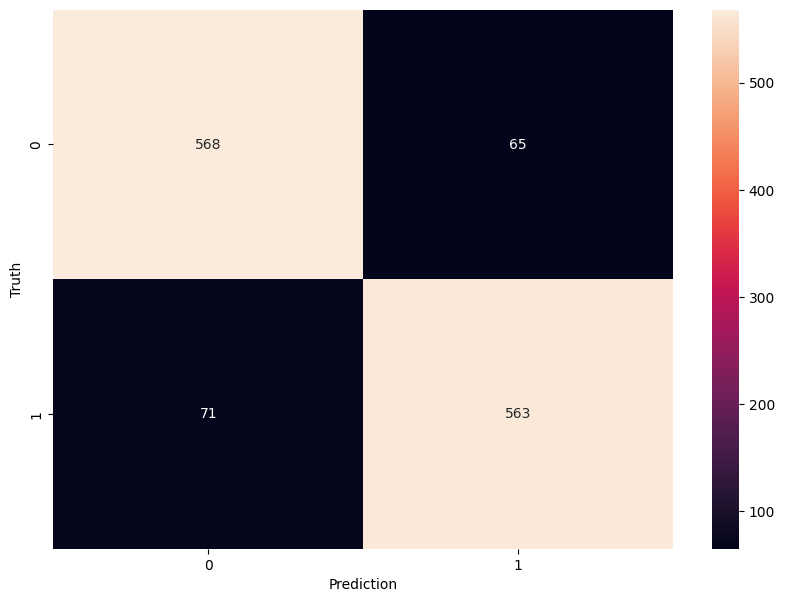

In [29]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

The easy calculation of probabilities for the words in the corpus(Bag of words) and storing them in a contingency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm